<a href="https://colab.research.google.com/github/basharE/EX2-Images-Classifier/blob/main/EX2_Q6_Q9_201290913_043218718.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic classification: Classify images of digits

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.0


## Import the MNIST dataset

In [ ]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
class_names = ['Zero', 'One', 'Two', 'Three', 'Four',
               'Five', 'Six', 'Seven', 'Eight', 'Nine']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [ ]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [ ]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [ ]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [ ]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

### Question 6 
### In this section we will prepare the data for Question 6
### And will be another section for predictions and ploting the results in Question 6 


##### First and second images in the test images has been taken
##### First image equals 2
##### Second image equals 7
##### The variable "test_images_100" contains the 100 images calculated between the first and  the second images 

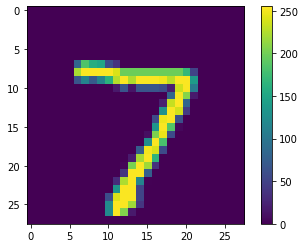

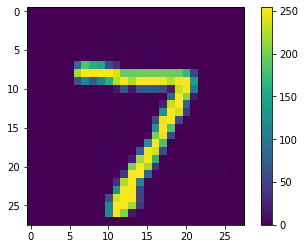

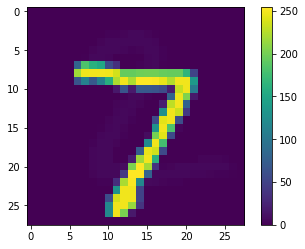

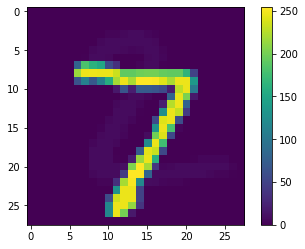

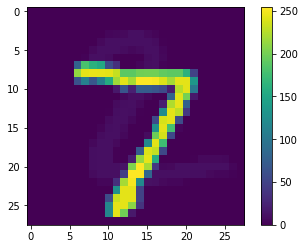

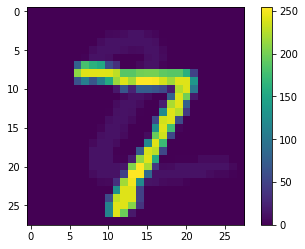

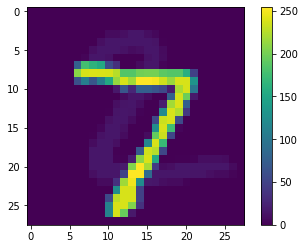

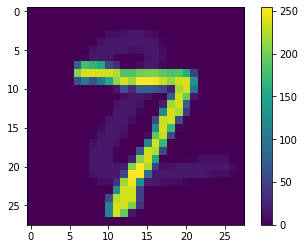

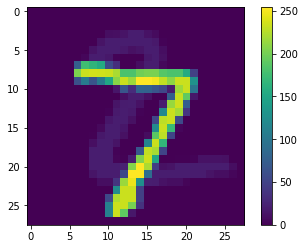

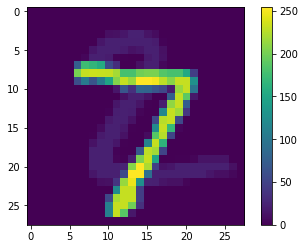

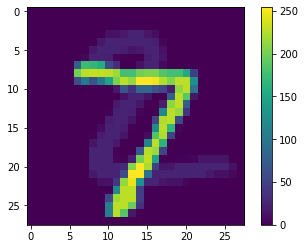

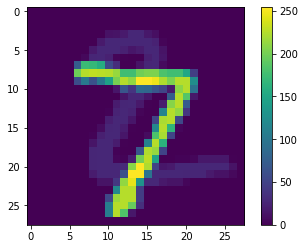

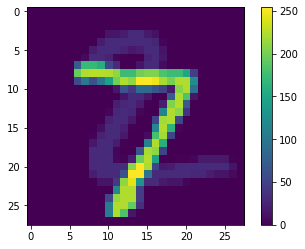

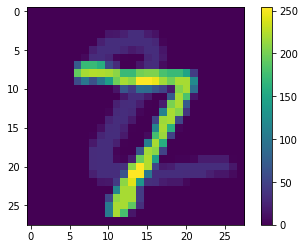

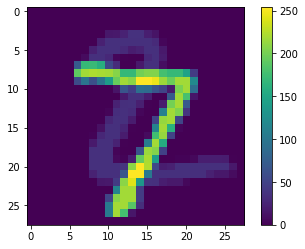

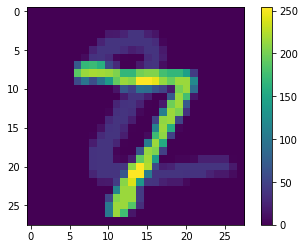

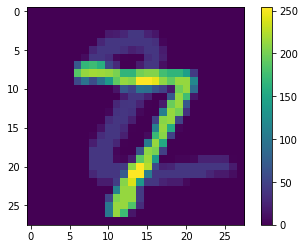

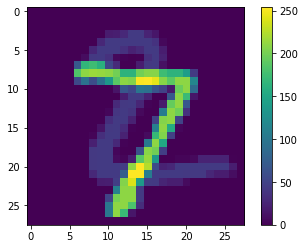

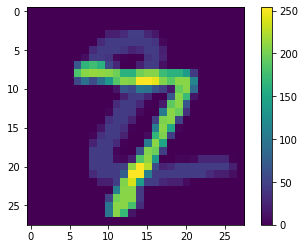

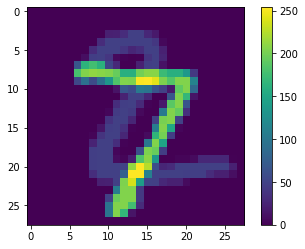

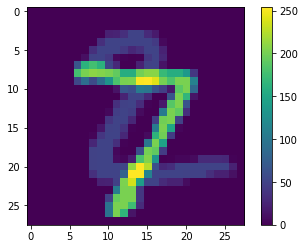

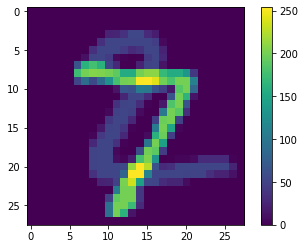

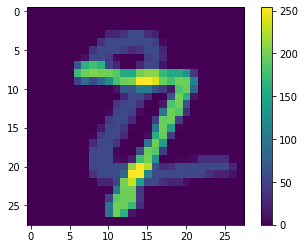

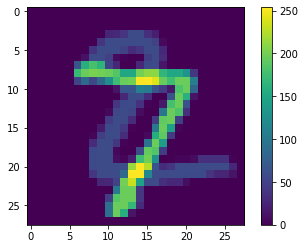

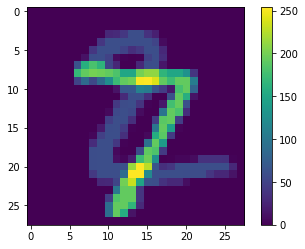

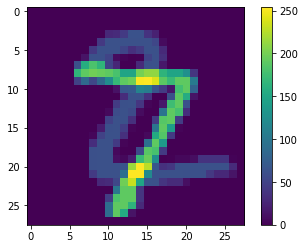

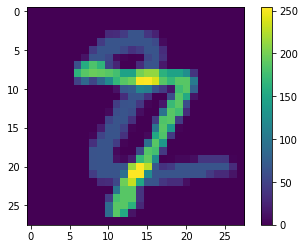

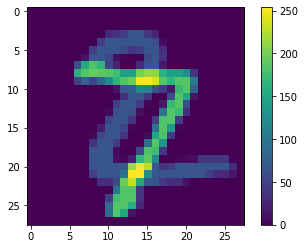

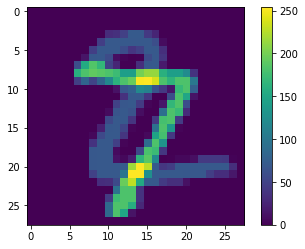

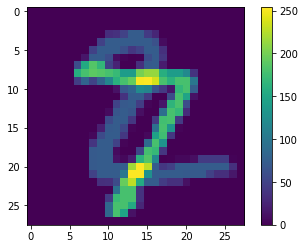

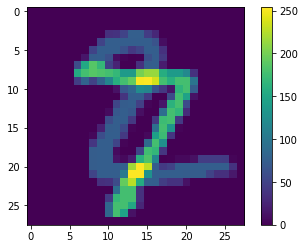

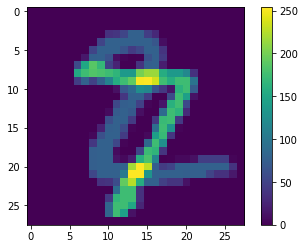

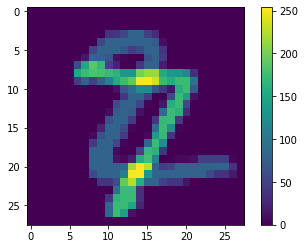

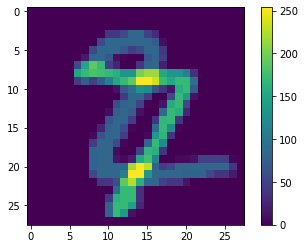

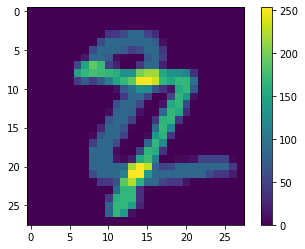

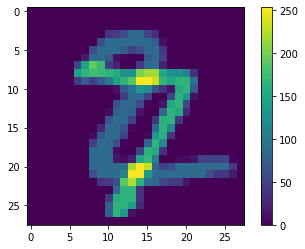

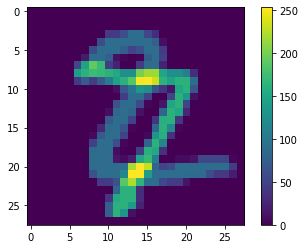

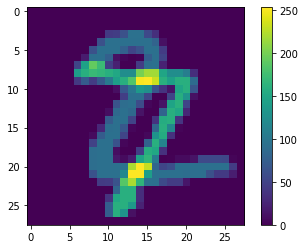

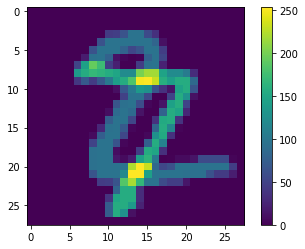

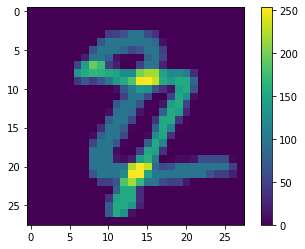

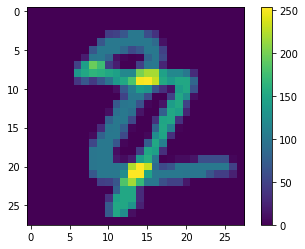

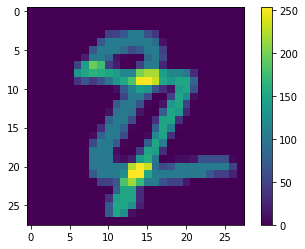

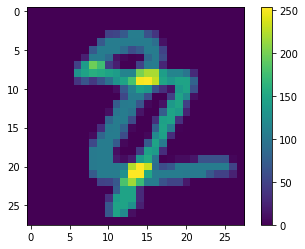

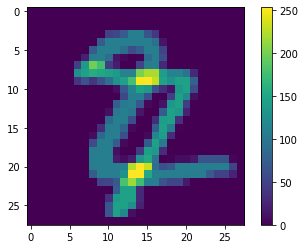

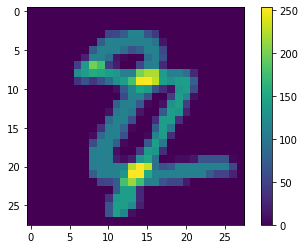

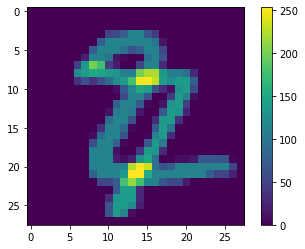

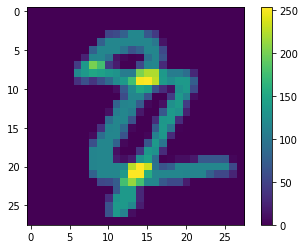

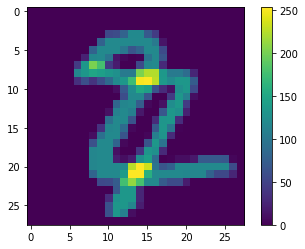

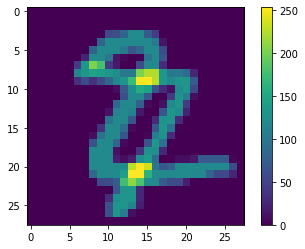

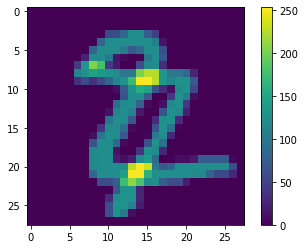

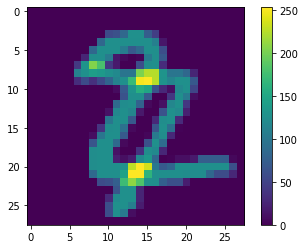

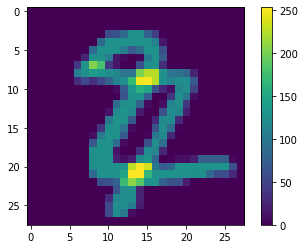

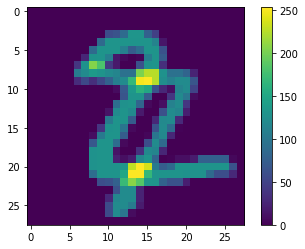

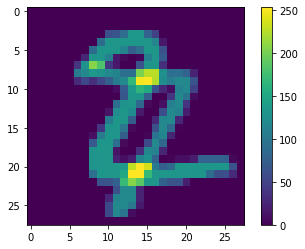

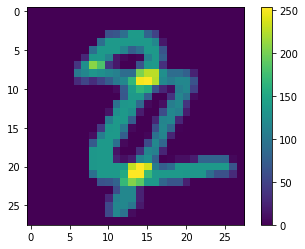

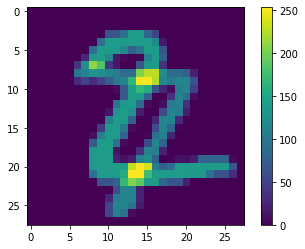

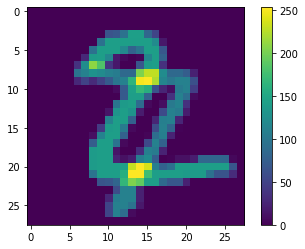

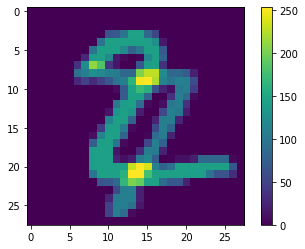

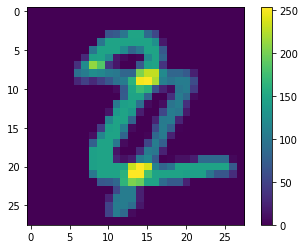

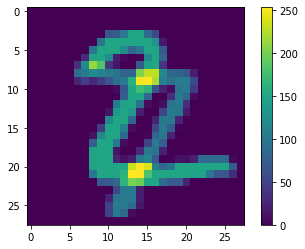

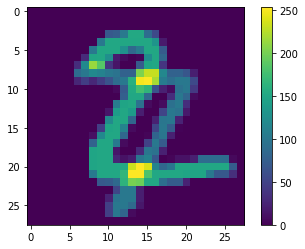

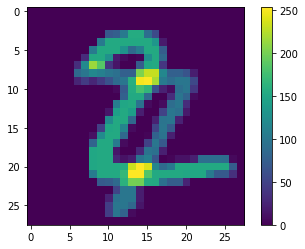

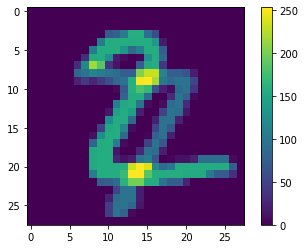

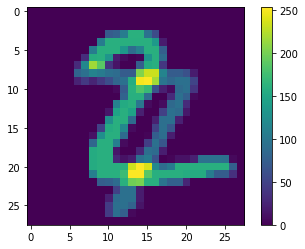

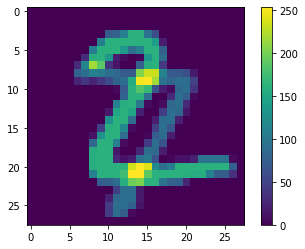

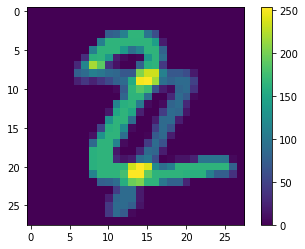

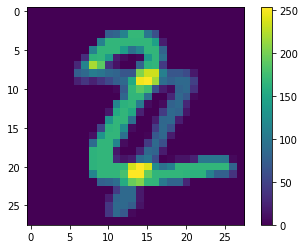

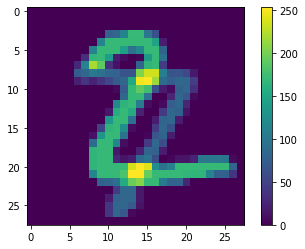

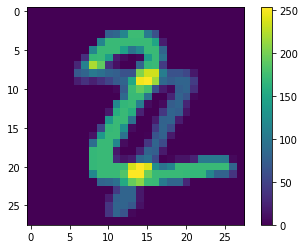

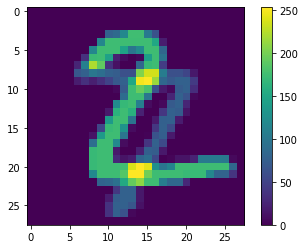

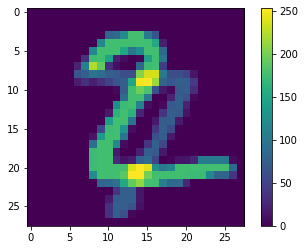

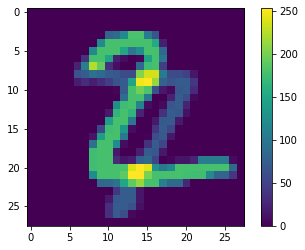

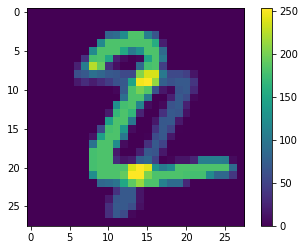

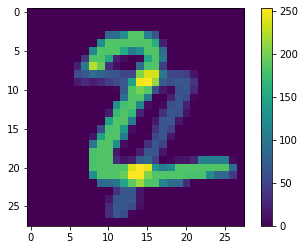

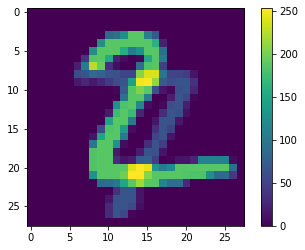

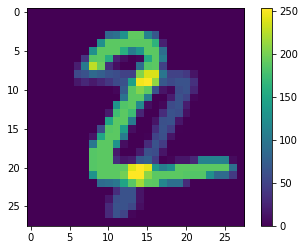

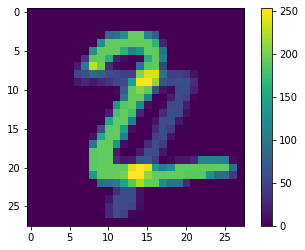

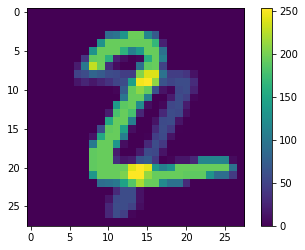

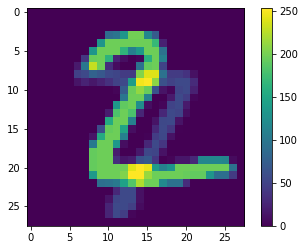

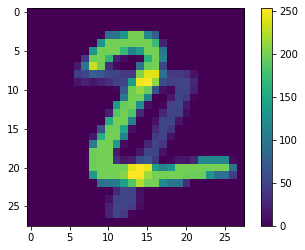

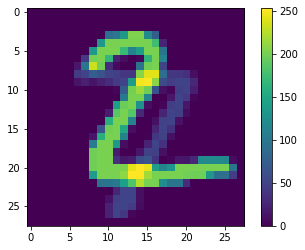

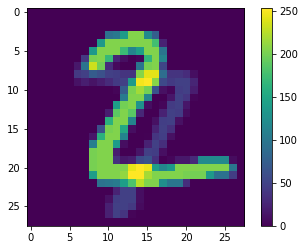

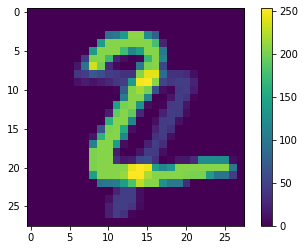

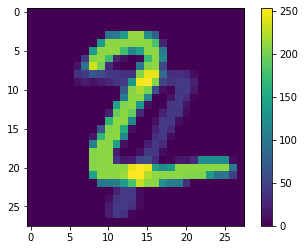

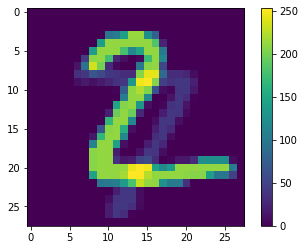

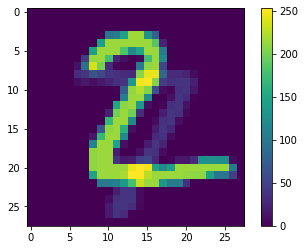

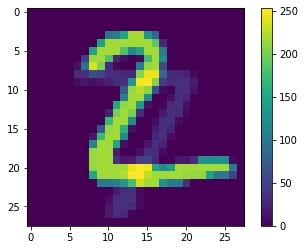

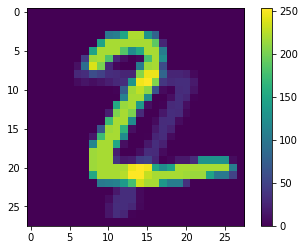

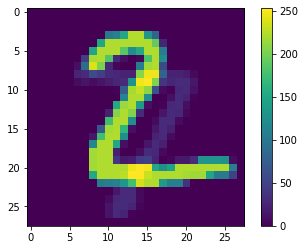

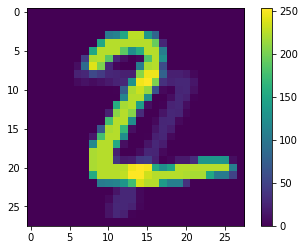

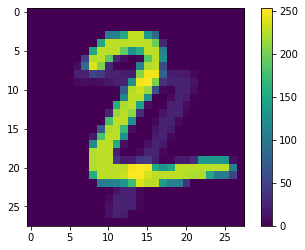

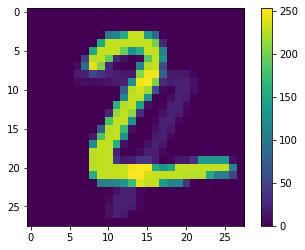

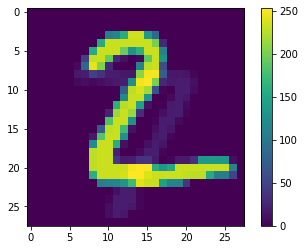

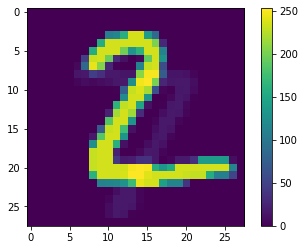

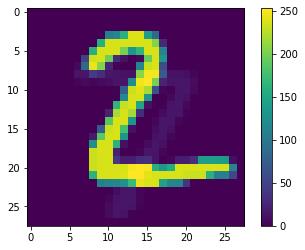

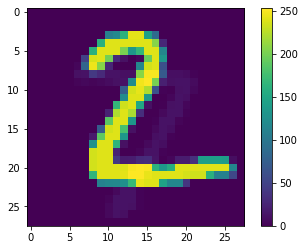

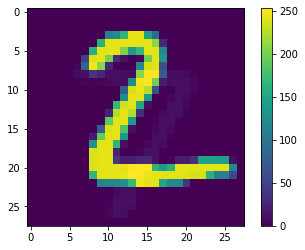

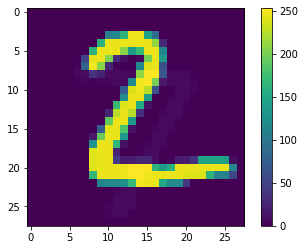

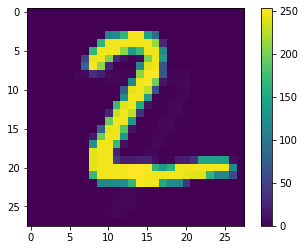

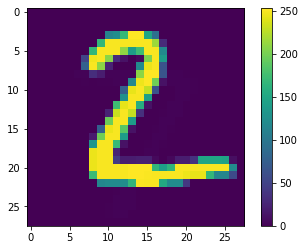

(100, 28, 28)

In [ ]:
first_image = test_images[1]
second_image = test_images[0]
test_images_100 = []
for alpha in np.arange(0, 1, 0.01):
  the_image = first_image*alpha + (1-alpha)*second_image
  plt.figure()
  plt.imshow(the_image)
  plt.colorbar()
  plt.grid(False)
  plt.show()
  test_images_100.append(the_image)

test_images_100 = np.array(test_images_100)
test_images_100.shape

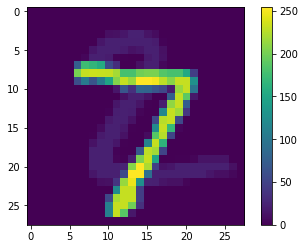

In [ ]:
plt.figure()
plt.imshow(test_images_100[9])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [ ]:
train_images = train_images / 255.0

## We use the "test_images" variable as our 100 images container

test_images = test_images_100 / 255.0


## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data:

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4262 - accuracy: 0.8802
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1212 - accuracy: 0.9638
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0786 - accuracy: 0.9769
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0567 - accuracy: 0.9831
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0426 - accuracy: 0.9870
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0333 - accuracy: 0.9901
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0241 - accuracy: 0.9926
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0189 - accuracy: 0.9945
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0159 - accuracy: 0.9956
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.012

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [ ]:
train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)

print('\nTrain accuracy:', train_acc)

1875/1875 - 2s - loss: 0.0152 - accuracy: 0.9953

Train accuracy: 0.9952999949455261


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

## Make predictions

With the model trained, you can use it to make predictions about some images.
The model's linear outputs, [logits](https://developers.google.com/machine-learning/glossary#logits). Attach a softmax layer to convert the logits to probabilities, which are easier to interpret. 

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

##### Get layers details 

In [ ]:
print(model.layers[0].output)
print(model.layers[1].output)
print(model.layers[2].output)

KerasTensor(type_spec=TensorSpec(shape=(None, 784), dtype=tf.float32, name=None), name='flatten/Reshape:0', description="created by layer 'flatten'")
KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='dense/Relu:0', description="created by layer 'dense'")
KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='dense_1/BiasAdd:0', description="created by layer 'dense_1'")


### Question 7 
##### Build model for getting output for specific layer

In [ ]:
layer_name = 'dense'
intermediate_layer_model = tf.keras.Model(inputs=model.input,
                                       outputs=model.get_layer(layer_name).output)

##### Get values of the prediction from intermediate layer
##### Printing the two images as V1 and V2



In [ ]:
intermediate_output_1 = intermediate_layer_model(test_images)
V1 = intermediate_output_1[0]
V2 = intermediate_output_1[99]
print(V1)
print("***************************************************************")
print(V2)

tf.Tensor(
[0.         1.504592   1.298146   0.         4.8691964  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         3.6386392  0.         0.
 0.         0.         0.11296787 0.         0.98872364 0.14620706
 2.6947207  0.         0.         0.         0.         2.733871
 2.1853414  4.282751   0.9541144  0.         1.7962822  2.3048215
 0.90511656 0.         3.0500138  0.38789696 0.         4.647919
 0.         0.         0.         3.339476   2.2094085  0.
 0.         1.3729186  0.         0.22172955 0.         0.
 0.         1.7314532  1.0761454  0.         0.         0.
 0.         0.         0.         1.4176149  0.         0.
 0.         0.16514057 0.         0.         0.         3.9316657
 0.4005988  0.22346178 1.2741526  5.7308044  2.0563405  3.004996
 1.0368115  0.9232671  1.0396659  0.         0.         0.
 0.4232434  2.7843595  0.         3.2629602  0.55789864 0.
 0.         0.         1.00546    0.4609768  5.4292703  0.
 2.41

### Question 8
#### Prdicting the two vectors V1,V2

In [ ]:
idx = 2  # index of desired layer
input_shape = model.layers[idx].get_input_shape_at(0) # get the input shape of desired layer
layer_input = tf.keras.Input(shape=(None,128)) # a new input tensor to be able to feed the desired layer

x = layer_input
for layer in model.layers[idx:]:
    x = layer(x)

# create the model
new_model = tf.keras.Model(layer_input, x)

In [ ]:
probability_model = tf.keras.Sequential([new_model, 
                                         tf.keras.layers.Softmax()])
intermediate_predictions = probability_model.predict(intermediate_output_1)
print("Prediction for V1, V2: ")

print("V1: ",np.argmax(intermediate_predictions[0]))
print("V2: ",np.argmax(intermediate_predictions[99]))

Prediction for V1, V2: 
V1:  7
V2:  2


### Question 6 - Plotting Predictions
##### Plotting the results for both the classification on 100 images
##### Plotting the results for both the probability on 100 images, for the number 7, number 2 and the max probability.



In [ ]:
def plot_image(i, predictions_array, img):
  img = img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  plt.xlabel("{} {:2.0f}% ".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                color='blue'))


def plot_value_array(i, predictions_array):
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('blue')

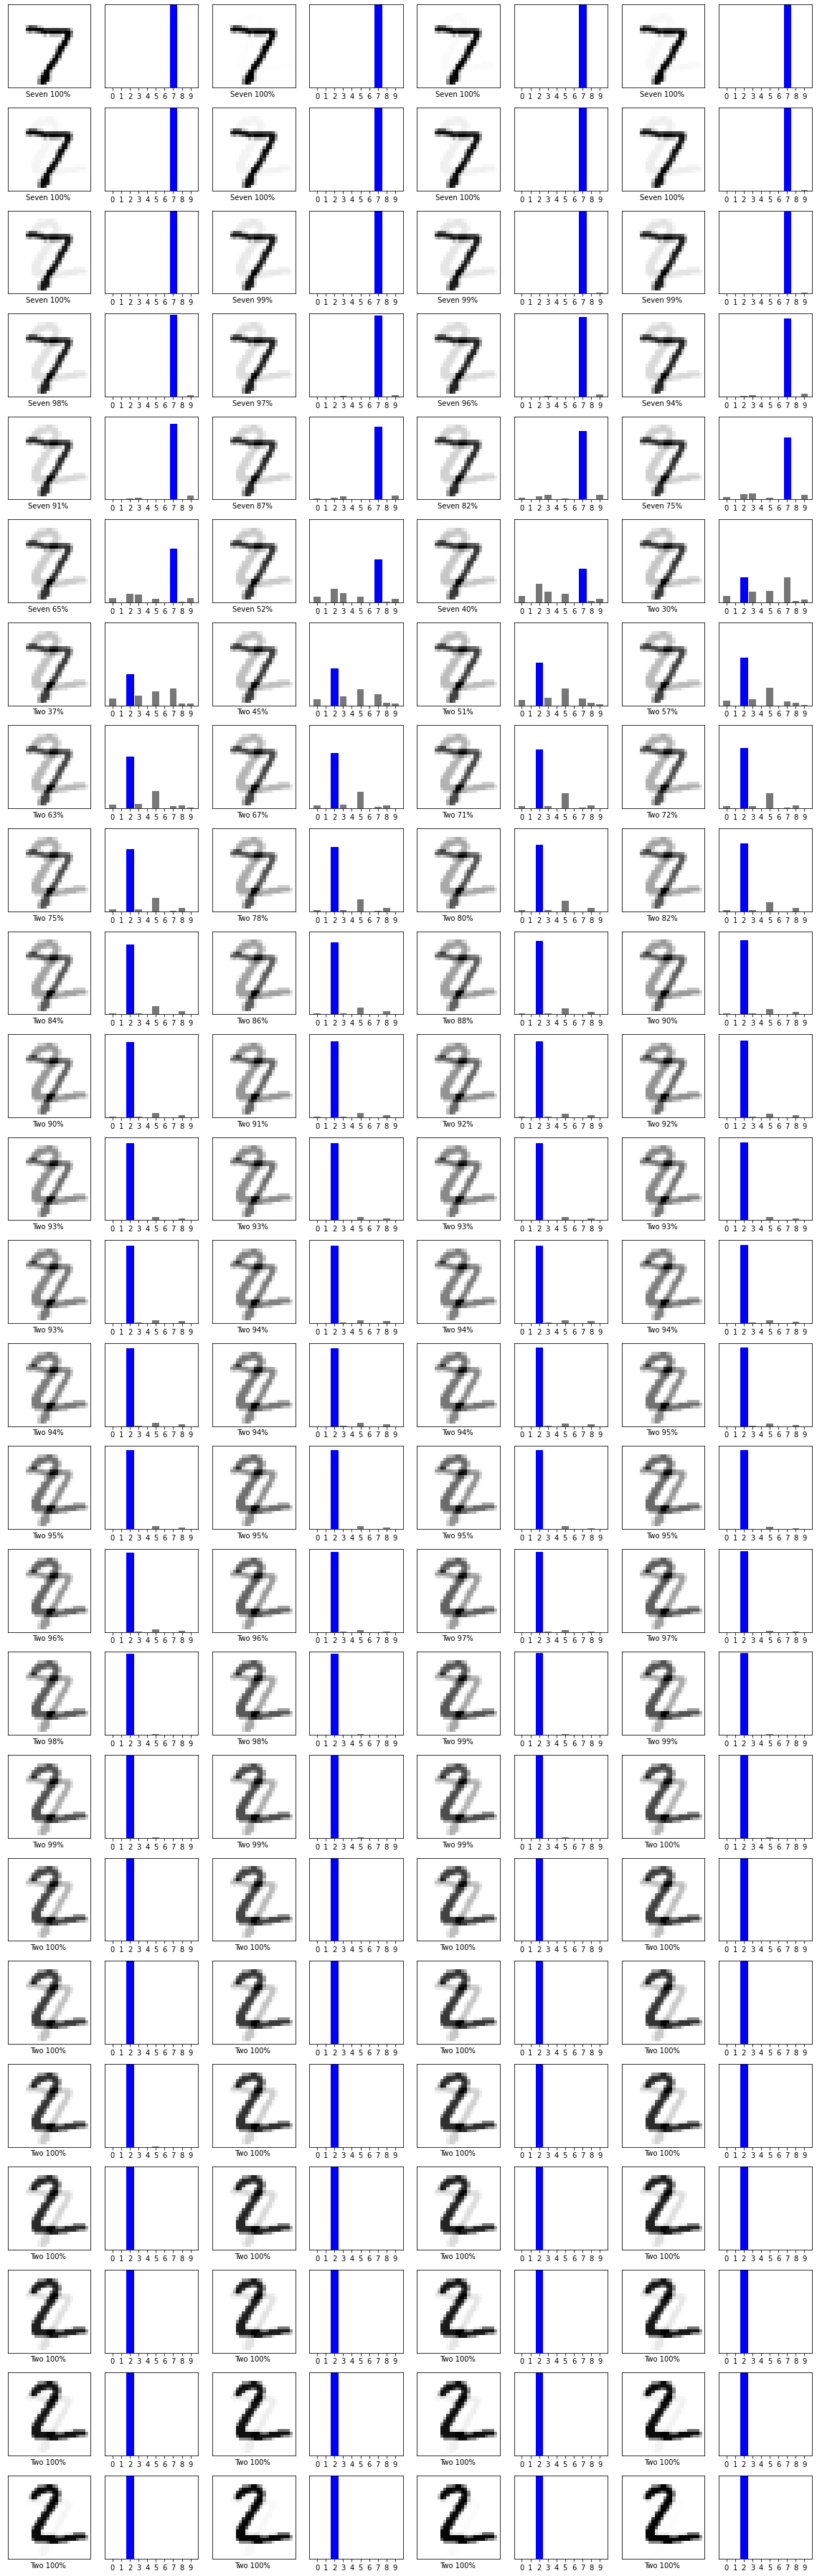

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 25
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i])
plt.tight_layout()
plt.show()

********************


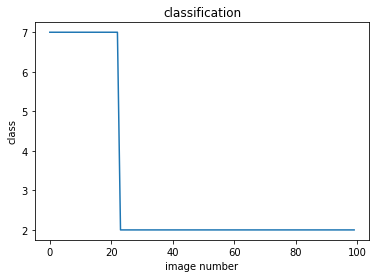

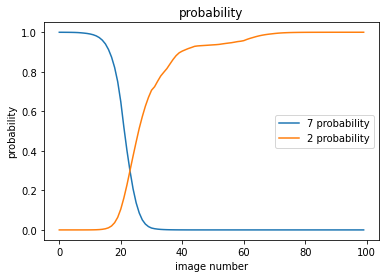

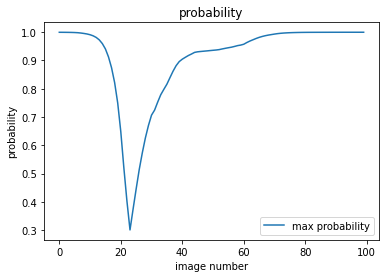

In [ ]:
image_number = []
argmax_image = []

probability_7_image = []
probability_2_image = []
max_image = []
for a in range(0,100):
  image_number.append(a)
  # plt.figure()
  # plt.imshow(test_images[a])
  # plt.colorbar()
  # plt.grid(False)
  # plt.show()
  # print("image number: ", a)
  # print("classification : ",np.argmax(predictions[a]))
  argmax_image.append(np.argmax(predictions[a]))
  # print("probability : ",np.max(predictions[a]))
  max_image.append(np.max(predictions[a]))
  # print("probability 7 :",predictions[a][7])
  probability_7_image.append(predictions[a][7])
  # print("probability 2 :",predictions[a][2])
  probability_2_image.append(predictions[a][2])
  # print("probability",predictions[a])

print("********************")



# importing the required module 
import matplotlib.pyplot as plt 
  
# plotting the points  
plt.plot(image_number, argmax_image) 
  
# naming the x axis 
plt.xlabel('image number') 
# naming the y axis 
plt.ylabel('class') 
  
# giving a title to my graph 
plt.title('classification') 
  
# function to show the plot 
plt.show() 

# plotting the points  
plt.plot(image_number, probability_7_image,label = "7 probability") 
plt.plot(image_number, probability_2_image,label = "2 probability") 

# naming the x axis 
plt.xlabel('image number') 
# naming the y axis 
plt.ylabel('probability') 
  
# giving a title to my graph 
plt.title('probability') 
  
# show a legend on the plot 
plt.legend() 

# function to show the plot 
plt.show()

# plotting the points  
plt.plot(image_number, max_image,label = "max probability") 

# naming the x axis 
plt.xlabel('image number') 
# naming the y axis 
plt.ylabel('probability') 
  
# giving a title to my graph 
plt.title('probability') 
  
# show a legend on the plot 
plt.legend() 

# function to show the plot 
plt.show()

### Question 9



#### Building the new vectors (between V1,V2)

In [ ]:
first_v = V1
second_v = V2

test_vectors_50 = []
alpha_vector = []

for alpha in np.arange(-1, 2, 0.06):
  alpha_vector.append(alpha)
  the_vector = first_v*alpha + (1-alpha)*second_v
  test_vectors_50.append(the_vector)

test_vectors_50 = np.array(test_vectors_50)
test_vectors_50.shape

(50, 128)

#### Predicting the new vectores

In [ ]:
test_vectors_50_predictions = probability_model.predict(test_vectors_50)

#### Extracting probabilities for 7 and 2 from the prediction 

In [ ]:

probability_7_vector = []
probability_2_vector = []
for a in range(0,50):
  probability_7_vector.append(test_vectors_50_predictions[a][7])
  probability_2_vector.append(test_vectors_50_predictions[a][2])

#### Ploting the results

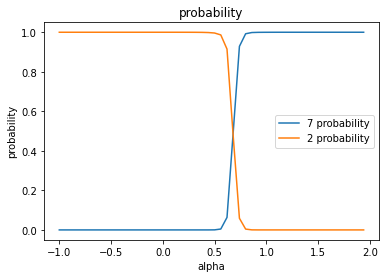

In [ ]:
# plotting the points  
plt.plot(alpha_vector, probability_7_vector,label = "7 probability") 
plt.plot(alpha_vector, probability_2_vector,label = "2 probability") 

# naming the x axis 
plt.xlabel('alpha') 
# naming the y axis 
plt.ylabel('probability') 
  
# giving a title to my graph 
plt.title('probability') 
  
# show a legend on the plot 
plt.legend() 

# function to show the plot 
plt.show()